Vaccuum Rabi Splitting

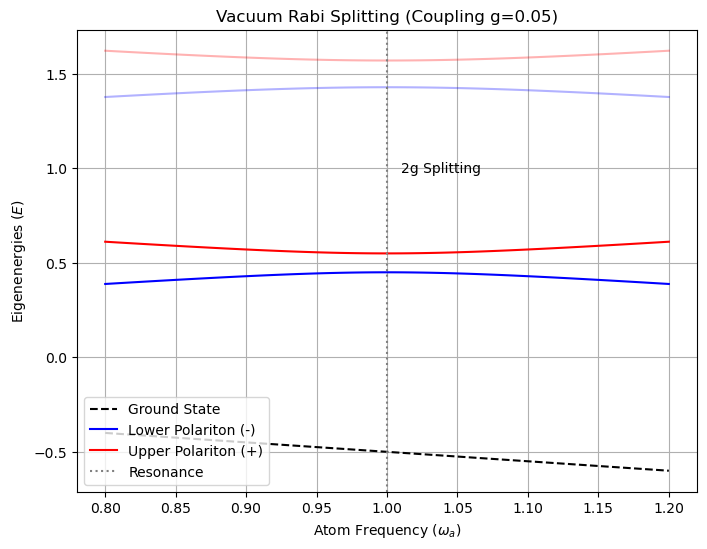

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

def calculate_energies(N, w_c, w_a_list, g):
    eigenvalues = []
    
    a = tensor(destroy(N), qeye(2))
    
    for w_a in w_a_list:
        # 1. Build Hamiltonian for this specific atom frequency
        # Note: We subtract the ground state energy to make the plot clearer
        # H = wc*a+a + wa*sz/2 + g(interaction)
        
        # Operators
        sz = tensor(qeye(N), sigmaz())
        sm = tensor(qeye(N), sigmam())
        
        H = (w_c * a.dag() * a) + (0.5 * w_a * sz) + (g * (a.dag() * sm + a * sm.dag()))
            
        # 2. Calculate Eigenvalues
        evals = H.eigenenergies()
        eigenvalues.append(evals)
        
    return np.array(eigenvalues)

# --- Parameters ---
N = 60                  # Hilbert Space Size
w_c = 1.0               # Cavity is fixed at 1.0
g = 0.05                # Coupling Strength
w_a_list = np.linspace(0.8, 1.2, 100) # Sweep Atom Freq from 0.8 to 1.2

# Calculate
energies = calculate_energies(N, w_c, w_a_list, g)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the first few energy levels
# Level 0: Ground State
ax.plot(w_a_list, energies[:, 0], 'k--', label="Ground State")

# Levels 1 & 2: The First Excitation Manifold (The Splitting)
# This is where |1,g> and |0,e> mix.
ax.plot(w_a_list, energies[:, 1], 'b', label="Lower Polariton (-)")
ax.plot(w_a_list, energies[:, 2], 'r', label="Upper Polariton (+)")

# Levels 3 & 4: The Second Excitation Manifold
ax.plot(w_a_list, energies[:, 3], 'b', alpha=0.3)
ax.plot(w_a_list, energies[:, 4], 'r', alpha=0.3)

# Add a vertical line at Resonance
ax.axvline(x=w_c, color='gray', linestyle=':', label="Resonance")

ax.set_xlabel("Atom Frequency ($\omega_a$)")
ax.set_ylabel("Eigenenergies ($E$)")
ax.set_title(f"Vacuum Rabi Splitting (Coupling g={g})")
ax.legend()
ax.grid(True)

# Highlight the splitting at resonance
plt.text(w_c + 0.01, 1.0, "2g Splitting", verticalalignment='center')

plt.show()